# Installing Dependencies

In [1]:
#!pip install numpy

In [2]:
#!pip install pandas

In [3]:
#!pip install seaborn

In [4]:
#!pip install sklearn

In [5]:
#!pip install matplotlib

# Importing the Libraries

In [6]:
# will hide errors like outdated verisions
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [8]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('gold_price_data.csv')

In [9]:
df = data.copy() # creating a copy for further use

In [10]:
# print first 5 rows in the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
# print last 5 rows of the dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# number of rows and columns
data.shape

(2290, 6)

In [13]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# checking the number of missing values in Gold Data 
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
data.duplicated().sum() # checking the duplicate values in Gold Data 


0

In [16]:
# getting the statistical measures of the Gold data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation -> Rising values in one variable align with increasing values in another
2. Negative Correlation -> Rising values in one variable align with decreasing values in another

In [17]:
data = data.drop(["Date"], axis=1)
correlation = data.corr()

<Axes: >

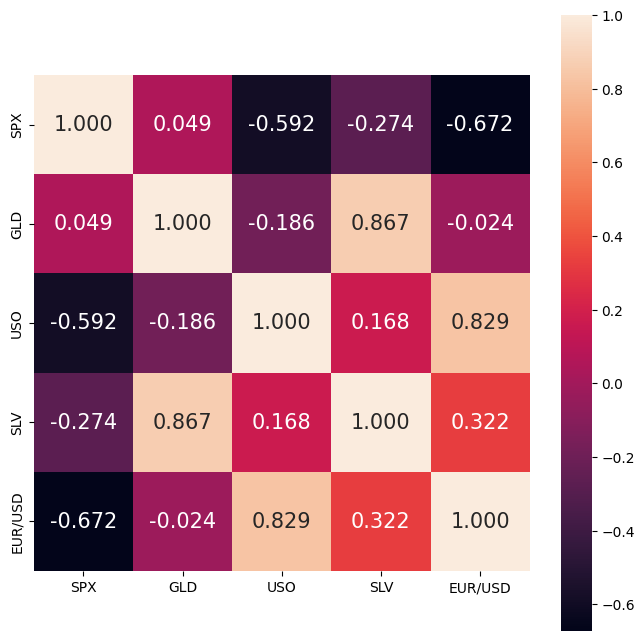

In [18]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f',annot=True, annot_kws={'size':15})

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

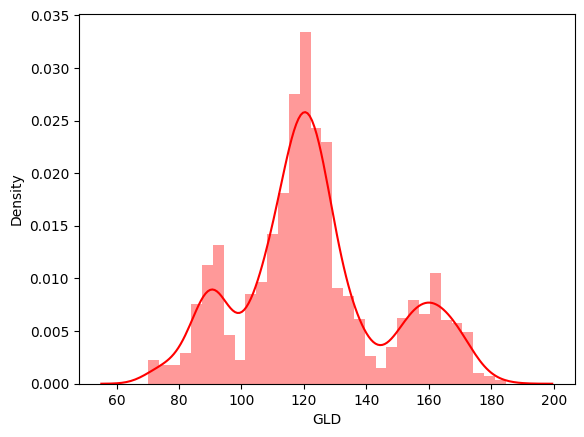

In [20]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='red')

Splitting the Features and Target

In [21]:
# df is copy of data we created above
A = df.drop(['Date','GLD'],axis=1)
B = df['GLD']

In [22]:
print(A)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(B)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

#### (n_estimators) represents number of trees in forest. Usually the higher number of trees better to learn data.

In [25]:
regressor = RandomForestRegressor(n_estimators=500)

In [26]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

Model Evaluation

In [27]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[122.42880716 130.53518274 127.57043968  96.61733736 118.91102075
 114.51123932 124.80924133 117.70951933 107.99598126  98.21913969
  95.54207935 167.83277817 149.34120095 116.17660066 170.76428147
  85.09599975 123.07791875 109.04711713 113.29302068 131.60998281
 124.29581878 113.63996074 115.89326079 108.68905979 108.48402125
 125.78461925 118.78991974 112.30945922 113.61394151 125.65411886
 146.07198155  89.4813399  167.79053963 113.78349929 108.45302111
 120.2143211  141.94849873 161.21500135 174.14803795 153.19468128
 119.38704106 113.54356043 121.34077954 113.7061394  122.07340764
 107.98574081  88.58035895 114.42721923 129.79484227 117.93816112
 103.74922028 129.79766245 107.20327847 160.7044236  131.54978029
 118.14789964 146.98146068 135.17472211  95.59900102 124.64984137
 115.13545869  86.16204094 104.25319911 113.83184067  84.22531923
 122.31490777 116.45729901 113.54124195 165.37986286  92.23638025
  80.37042085 160.98010107 158.47422166 106.64742008 149.47082118
 109.70149

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score * 100)

R squared error :  99.0172005495421


Compare the Actual Values and Predicted Values in a Plot

In [30]:
Y_test = list(Y_test)

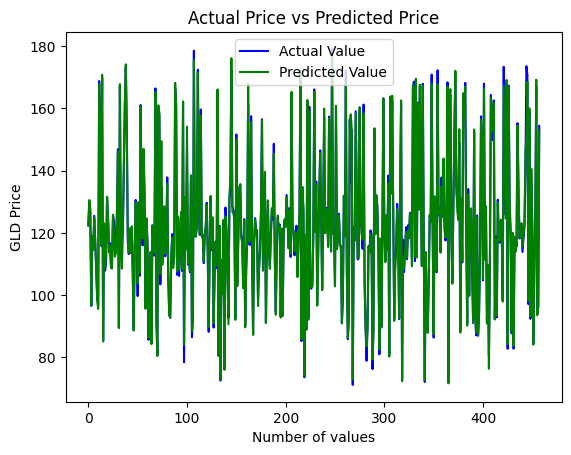

In [31]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()